In [51]:
# For query
import sys   
sys.path.append('../../src/data')
import query_data as query
from datetime import date

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [52]:
ls ../../data/processed

airlines.db


In [53]:
start_date = date(2017, 1, 1)
end_date = date(2017, 12, 31)
path_to_db = "sqlite:///../../data/processed/airlines.db"

flights_2017 = query.flight_and_delay_summary_by_airport(start_date=start_date, 
                                                        end_date=end_date, 
                                                        path_to_db=path_to_db)

sqlite:///../../data/processed/airlines.db


In [54]:
total = sum(flights_2017['flight_count'])
delayed = sum(flights_2017['delayed_count'])
fraction_delayed = round(delayed / total * 100, 2)

print(f"Of the {total:,} flights represented in the 2017 data, {delayed:,} ({fraction_delayed}%) were delayed.")

Of the 5,661,600 flights represented in the 2017 data, 975,868 (17.24%) were delayed.


In [55]:
flights_2017['fraction_delayed'] = flights_2017['flight_count'] / flights_2017['delayed_count']
busiest_2017 = flights_2017.sort_values(by='flight_count', ascending=False).head(20)
busiest_2017

,airport_id,origin_airport,city,state,flight_count,delayed_count,fraction_delayed
20,10397,ATL,"Atlanta, GA",GA,363955,62075,5.863149
224,13930,ORD,"Chicago, IL",IL,265918,48941,5.433440
82,11292,DEN,"Denver, CO",CO,222625,38458,5.788783
172,12892,LAX,"Los Angeles, CA",CA,213769,47977,4.455656
83,11298,DFW,"Dallas/Fort Worth, TX",TX,180771,32528,5.557397
275,14771,SFO,"San Francisco, CA",CA,174223,39340,4.428648
236,14107,PHX,"Phoenix, AZ",AZ,154147,23995,6.424130
170,12889,LAS,"Las Vegas, NV",NV,151365,30875,4.902510
274,14747,SEA,"Seattle, WA",WA,136847,21152,6.469696
212,13487,MSP,"Minneapolis, MN",MN,134317,17434,7.704313


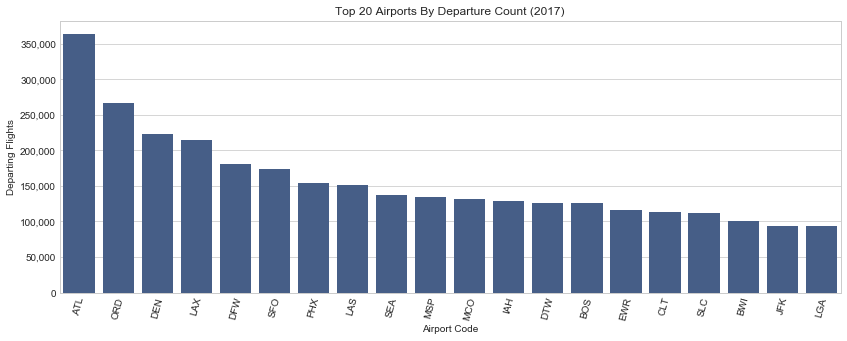

In [77]:
a4_dims = (14, 5)
fig, ax = plt.subplots(figsize=a4_dims)
_ = sns.barplot(data=busiest_2017, x='origin_airport', y='flight_count', ax=ax, color='#3b5b92')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
_ = plt.xlabel('Airport Code')
_ = plt.xticks(rotation=75)
_ = plt.ylabel('Departing Flights')
_ = plt.title(f'Top {len(busiest_2017)} Airports By Departure Count (2017)')
plt.show()